Pewna firma zajmująca się tworzeniem smartfonów zgłosiła się do nas, abyśmy stworzyli asystenta podróży. Asystent ten będzie odpowiedzialny za:

-Blokowanie powiadomień podczas spacerów oraz jazdy samochodem,

-Podsuwanie odpowiednich treści, mających umilić podróż autobusem oraz pociągiem,

-Odpowiednie regulowanie głośności multimediów w zależności od środka transportu,

-Automatyczne wypowiadanie wskazówek odnośnie dalszej podróży, jeżeli Użytkownik wskazał jej cel.

Po długich rozważaniach doszliśmy do wniosku, że najlepszym asystentem będzie model uczenia maszynowego. Firma tworząca smartfony, niestety nie zebrała odpowiednich danych potrzebnych do tego zadania, lecz doskonale wiemy, że w internecie znajdzie się wszystko. Przeszukaliśmy więc setki witryn aż w końcu odnaleźliśmy dane zebrane specjalnie do tworzenia takich samych modeli jakie są potrzebne naszemu Klientowi! 

Dane te zostały zebrane z telefonów 30 osób które zgodziły się na udział w pomiarach. Badani mieli za zadanie określać status ruchu jaki w danym momencie prowadzili. Więc klikali oni w ekrany telefonów za każdym razem jak wsiadali do auta, czy jak wychodzili na spacer. Dzięki temu dostaliśmy dane ze wszystkich dostępnych czujników w ich smartfonach, wraz z czasem trwania konkretnego statusu ruchu.

Dzięki uprzejmości tych 30 osób mamy teraz możliwość ułatwienia im codzienności. Więc nie ma na co czekać, stwórzmy asystenta!


Dysponujemy trzema zbiorami danych, w których zawarte są informacje pozyskane przez sensory. Na początek przyjrzyjmy się zbiorowi w którym zawarte są informację z akcelerometru, żyroskopu oraz sensora dźwięku. Jak podają osoby zajmujące się tworzeniem tych zbiorów, właśnie te sensory wykazują się największą korelacją ze statusem ruchu. 

Z racji, że dysponujemy niezbyt okazałym budżetem na tej projekt, spróbujemy stworzyć model przy wykorzystaniu mniejszej ilości zasobów. Jeżeli okaże się, że nasz model nie spełni naszych oczekiwań, sięgniemy po zbiory danych z wszystkich sensorów.

## Import Bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams["figure.figsize"] = (20,10)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
db = pd.read_csv('dataset_5secondWindow%5B1%5D.csv')

## Weryfikacja danych

In [5]:
db.head()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std,target
0,78.0,9.811476,9.758895,9.849411,0.014626,0.001651,0.000000,0.003533,0.000737,0.000000,0.000000,0.000000,0.000000,Still
1,145.0,9.939207,7.707437,17.146631,1.775944,0.036326,0.011669,0.059388,0.020290,89.200210,89.065143,89.335277,0.191013,Car
2,150.0,9.827178,9.804817,9.849262,0.011199,0.001525,0.000000,0.002609,0.000713,0.000000,0.000000,0.000000,0.000000,Still
3,105.0,9.673039,7.659674,12.304298,0.862553,0.036440,0.020463,0.052512,0.010553,87.470377,87.470377,87.470377,2.284186,Car
4,77.0,9.993466,8.965621,10.891645,0.504117,0.183202,0.020667,0.380875,0.098819,89.770732,89.770732,89.770732,0.006389,Car


Weryfikacja zbioru

In [6]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5893 entries, 0 to 5892
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   time                               5893 non-null   float64
 1   android.sensor.accelerometer#mean  5893 non-null   float64
 2   android.sensor.accelerometer#min   5893 non-null   float64
 3   android.sensor.accelerometer#max   5893 non-null   float64
 4   android.sensor.accelerometer#std   5893 non-null   float64
 5   android.sensor.gyroscope#mean      5893 non-null   float64
 6   android.sensor.gyroscope#min       5893 non-null   float64
 7   android.sensor.gyroscope#max       5893 non-null   float64
 8   android.sensor.gyroscope#std       5893 non-null   float64
 9   sound#mean                         5893 non-null   float64
 10  sound#min                          5893 non-null   float64
 11  sound#max                          5893 non-null   float

Brak pustych wartości.

In [7]:
db.describe()

,time,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.gyroscope#mean,android.sensor.gyroscope#min,android.sensor.gyroscope#max,android.sensor.gyroscope#std,sound#mean,sound#min,sound#max,sound#std
count,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000,5893.000000
mean,117.731716,10.007976,8.426262,12.247691,0.982987,0.274351,0.078560,0.645235,0.166669,65.445964,65.218848,65.672381,1.318661
std,126.474151,0.655949,1.783007,5.178436,1.505615,0.529583,0.195519,1.293279,0.327209,32.136026,32.129213,32.180745,2.871450
min,3.000000,7.369055,0.337166,8.801019,0.001286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,9.737143,7.805295,10.015566,0.078055,0.007377,0.002044,0.014884,0.003247,58.402467,57.741088,58.879778,0.000000
50%,70.000000,9.850143,9.123124,10.602081,0.369163,0.035267,0.008777,0.078057,0.019004,79.475484,79.086780,79.862550,0.037179
75%,152.000000,10.078998,9.691731,12.291575,1.058376,0.205268,0.054033,0.532054,0.135955,89.722940,89.720104,89.726909,1.487859
max,682.000000,17.427391,12.115013,66.886376,12.879851,5.662153,3.232744,28.860752,4.980892,90.308734,90.308734,90.308734,26.835546


Uprościjmy nazwy dla ułatwienia pracy.

In [8]:
db = db.rename(columns={"android.sensor.accelerometer#mean": "ASA_MEAN",
                   "android.sensor.accelerometer#min": "ASA_MIN",
                   "android.sensor.accelerometer#max": "ASA_MAX",
                   "android.sensor.accelerometer#std": "ASA_STD",
                   "android.sensor.gyroscope#mean": "ASG_MEAN",
                   "android.sensor.gyroscope#min": "ASG_MIN",
                   "android.sensor.gyroscope#max": "ASG_MAX",
                   "android.sensor.gyroscope#std": "ASG_STD",
                   "sound#mean": "SND_MEAN",
                   "sound#min": "SND_MIN",
                   "sound#max": "SND_MAX",
                   "sound#std": "SND_STD"}
          , errors="raise")

Wartości w kolumnie TIME można przerobić na int.

In [9]:
db['time'] = db['time'].astype(int)

Timestamp w tym zbiorze oznacza czas trwania statusu ruchu w minutach.

# EDA

Podzielmy dane, żeby uniknąć data snooping bias.

In [10]:
e_y = db['target']
e_X = db.drop(['target'], axis=1)

In [11]:
e_X_train, e_X_test, e_y_train, e_y_test = train_test_split(e_X, e_y, test_size=0.20, random_state=42)

Połączmy zbiory ponownie, na potrzeby EDA.

In [12]:
EDAta = pd.concat([e_X_train, e_y_train], axis=1)

Zwizualizujmy nasze dane.

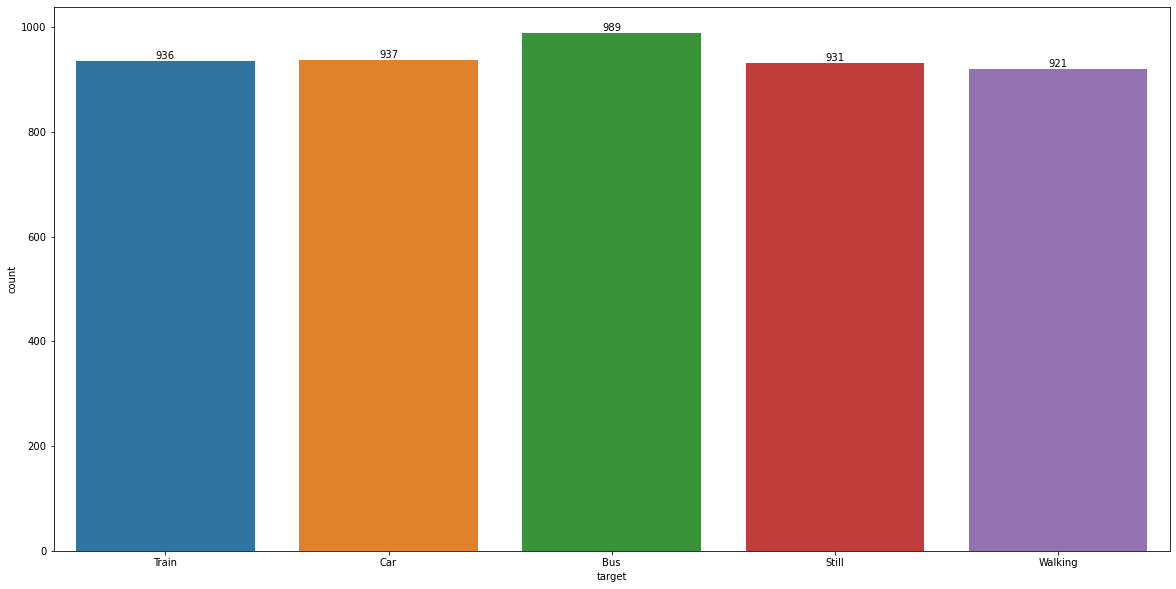

In [13]:
ax = sns.countplot(x=EDAta["target"])

ax.bar_label(ax.containers[0])
plt.show()

Jak widać dane rozkładają się mniej więcej po równo w każdej z kategorii. Rzućmy dane na osie z akcelerometru oraz żyroskopu.

Sprawdźmy ile czasu spędzili uczestnicy eksperymentu w poszczególnych statusach ruchu.

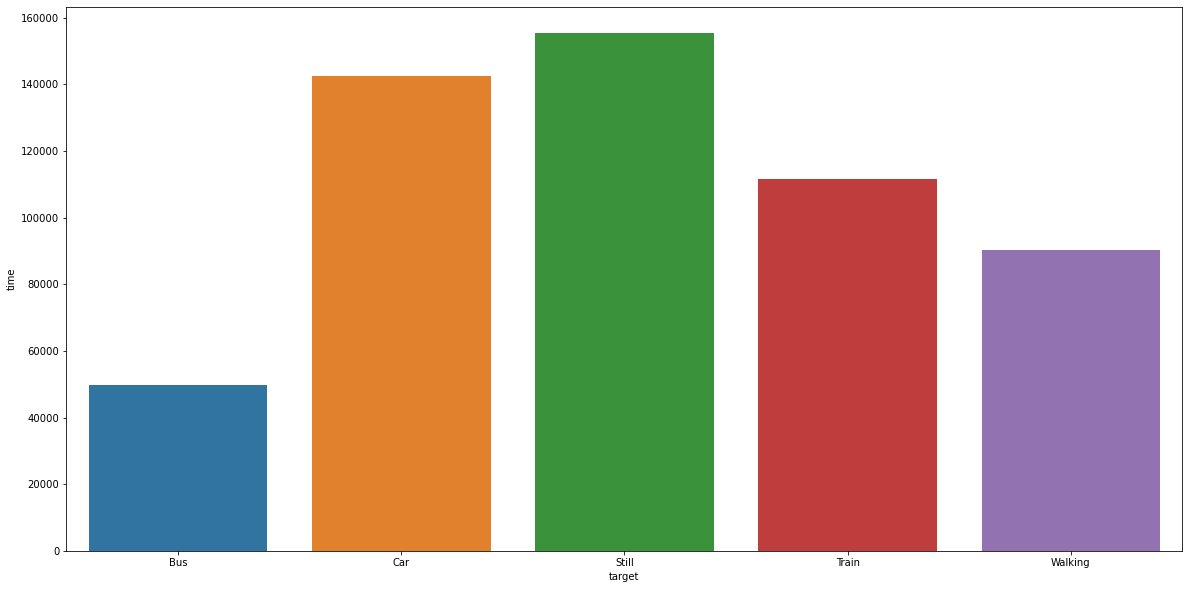

In [14]:
mode_time = EDAta.groupby(['target'])['time'].sum().reset_index()

sns.barplot(x='target', y='time', data=mode_time)
plt.show()

Jak widać, najczęściej pozostawali w bezruchu, a najmniej czasu spędzili na jeździe autobusem.

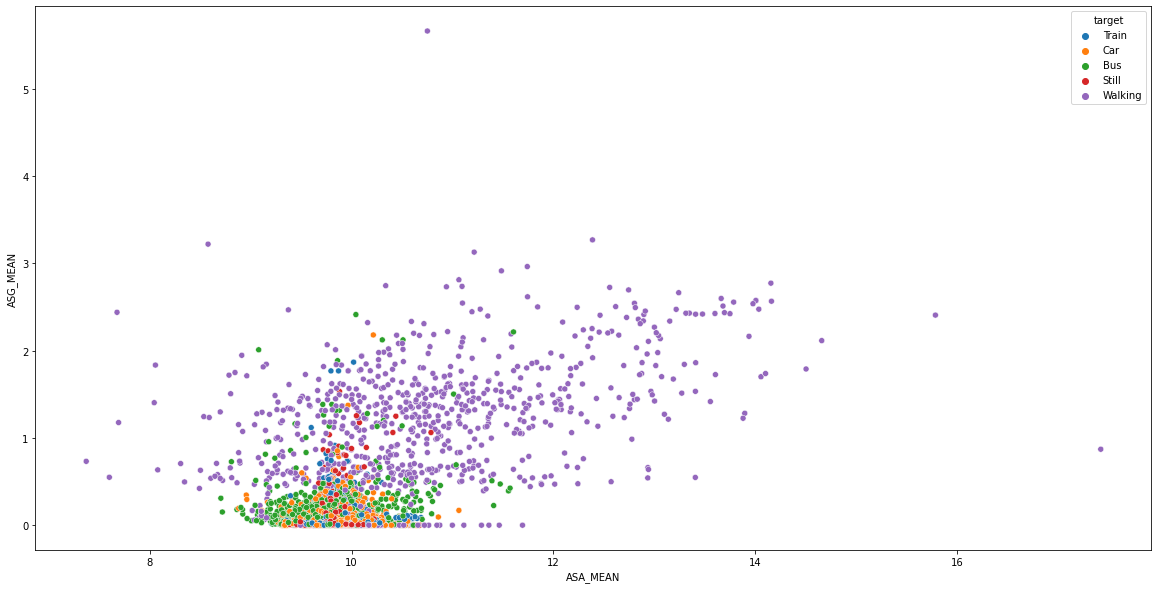

In [15]:
sns.scatterplot(data=EDAta, x='ASA_MEAN', y='ASG_MEAN', hue='target')
plt.show()

Nie widać oczywistych skupisk w podziale na statusy ruchów. Dane przynależące do kategorii 'Walking' są mocno rozproszone.

Dodatkowo, widocznych jest kilka outlierów z pozostałych grup mocno odstających od średnich wartości.

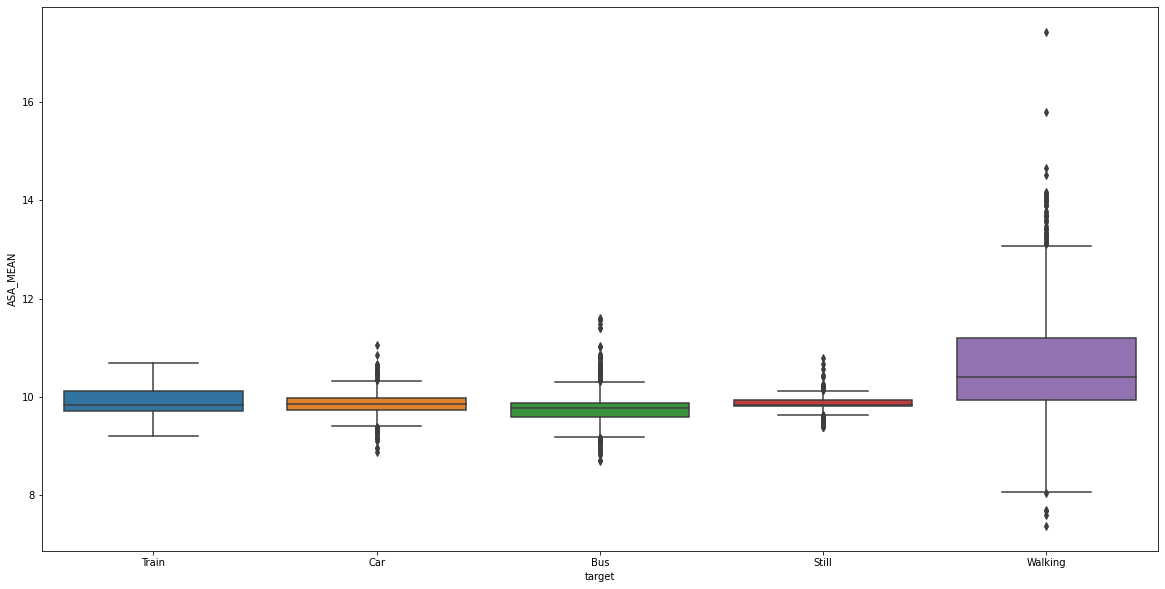

In [16]:
sns.boxplot(data=EDAta, x='target', y='ASA_MEAN')
plt.show()

Ten wykres potwierdza rozporszenie danych z kategorii 'Walking'. Pozostałe kategorie mają podobny rozkład z jednym głównym punktem zbiorczym.

Poza kategorią danych zebranych podczas jazdy pociągiem, widzimy spore ilości outlierów.

Sprawdźmy korelację pomiędzy cechami.

W tym celu zamienimy naszą zmienną niezależną na dane numeryczne.

In [17]:
corrEDAta = EDAta.copy()
d = corrEDAta['target'].astype('category')
codes = d.cat.codes
cats = d.cat.categories
corrEDAta['target'] = codes

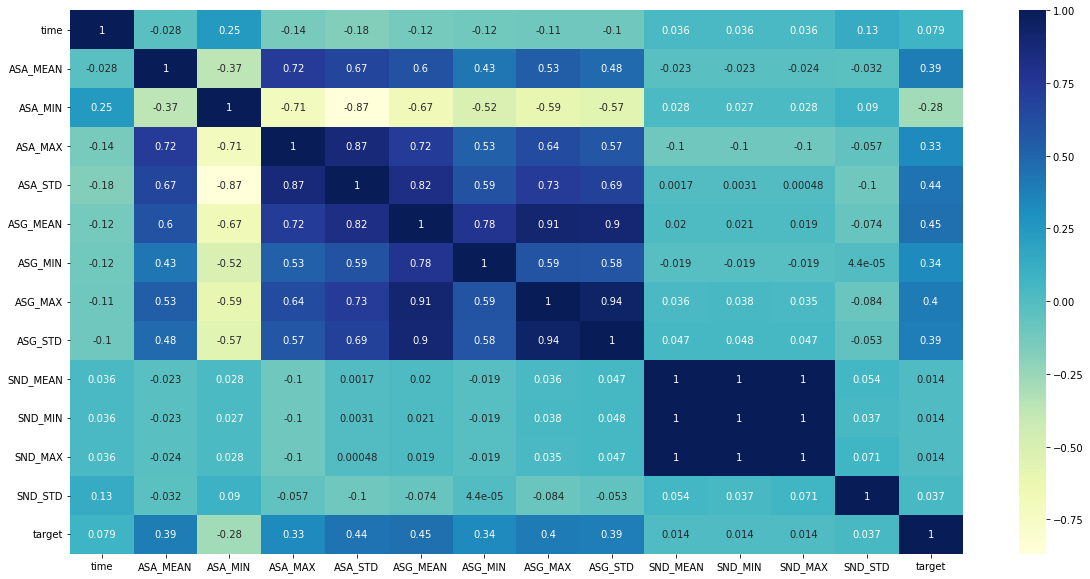

In [18]:
sns.heatmap(corrEDAta.corr(), cmap="YlGnBu", annot=True)
plt.show()

Widzimy wysokie wartości korelacji pomiędzy danymi z akcelerometra a danymi z żyroskopu.

Wróćmy znów do tekstowego wyrażenia naszej zmiennej niezależnej.

Dane z sensora dźwięku są maksymalnie skorelowane, co wskazuje, że niosą tą samą informację. Przyjżyjmy się im.

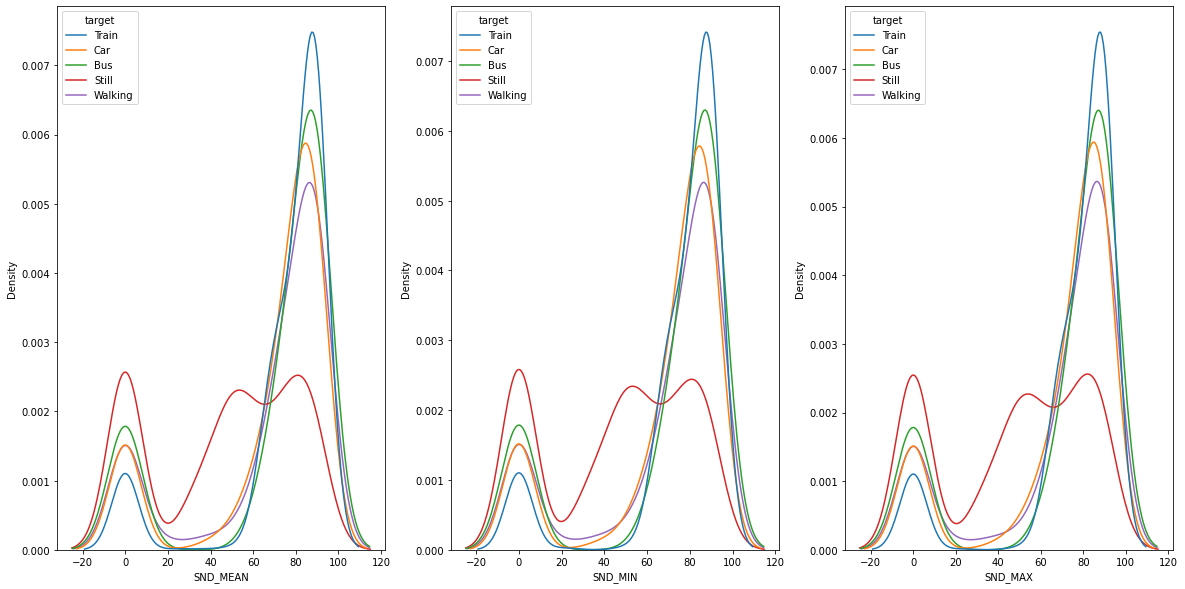

In [19]:
fig, axs = plt.subplots(ncols=3)

sns.kdeplot(data=EDAta, x="SND_MEAN", hue="target", ax=axs[0])
sns.kdeplot(data=EDAta, x="SND_MIN", hue="target",  ax=axs[1])
sns.kdeplot(data=EDAta, x="SND_MAX", hue="target", ax=axs[2])

plt.show()

Widzimy niemalże identyczne wykresy. Czy to oznacza, że poziom dźwięku nie zmienia się podczas trwania konkretnego statusu ruchu?

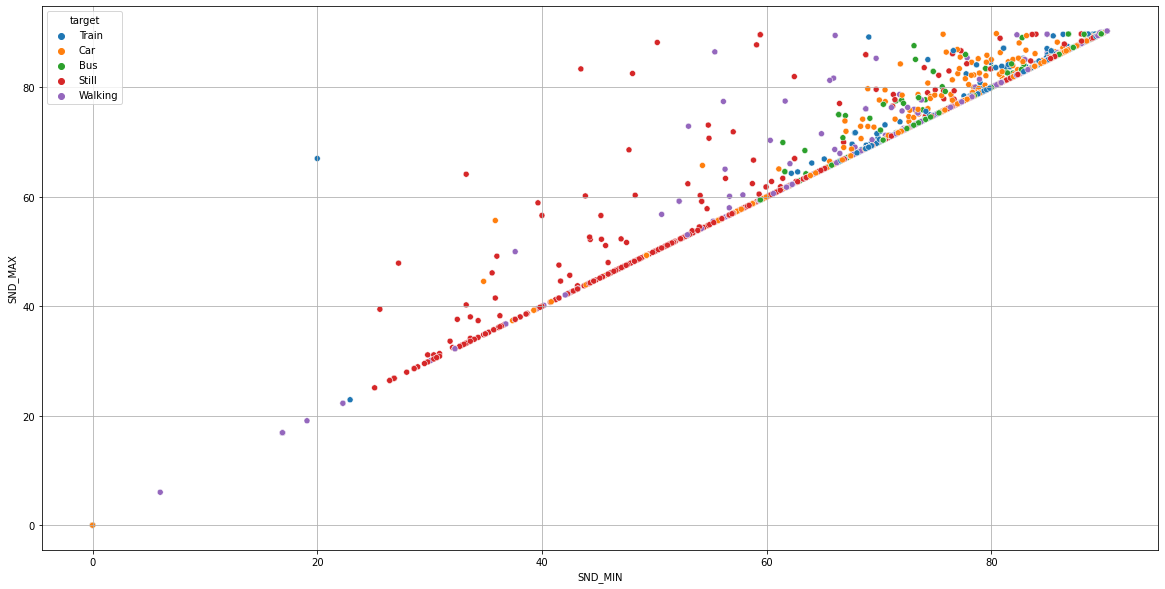

In [20]:
sns.scatterplot(data=EDAta, x='SND_MIN', y='SND_MAX', hue='target')
plt.grid()
plt.show()

Jak widać, wartość minimalna dźwięku w większości jest równa wartości maksymalnej. Nie widać za to, czy status ruchu ma na to wpływ.



Nasuwa się pytanie, jaki procent danych niesie tą samą informację?

In [21]:
print(np.round((np.sum(EDAta['SND_MIN'] == EDAta['SND_MAX']))/(EDAta['time'].count())*100, 2))

87.53


85 procent danych się pokrywa, skorzystamy w takim razie tylko z pomiaru wartości maksymalnej. Jednakże, sprawdźmy najpierw w ilu przypadkach wartość maksymalna pokrywa się ze średnią.

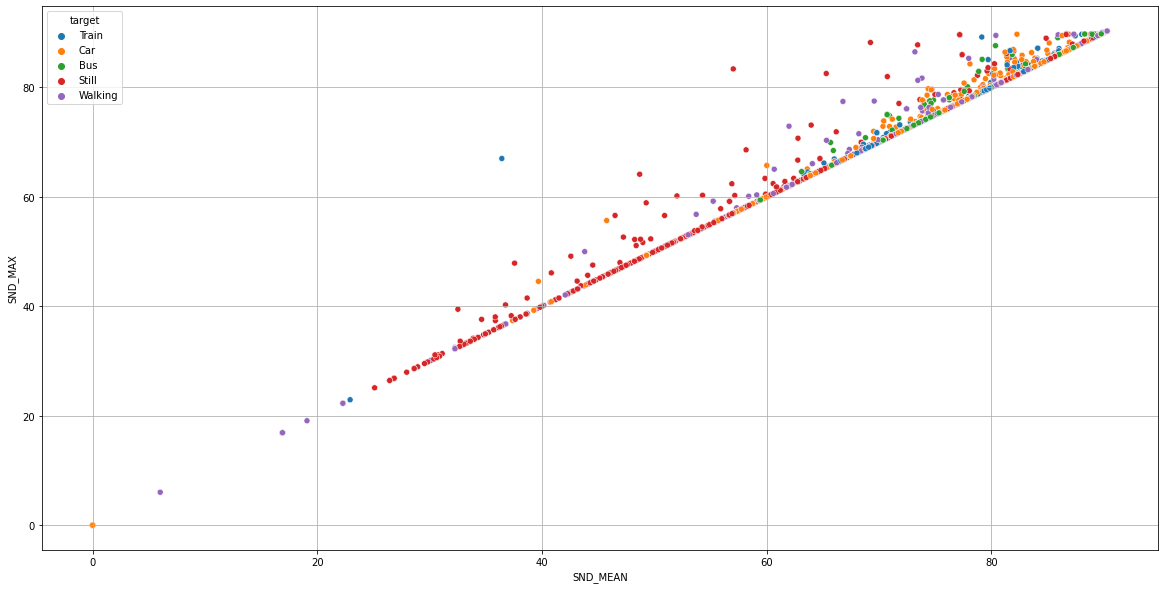

87.53


In [22]:
sns.scatterplot(data=EDAta, x='SND_MEAN', y='SND_MAX', hue='target')
plt.grid()
plt.show()

print(np.round((np.sum(EDAta['SND_MEAN'] == EDAta['SND_MAX']))/(EDAta['time'].count())*100, 2))

Dokładnie taki sam procent danych jak w przypadku różnicy pomiędzy wartością minimalną a maksymalną. Która z tych trzech kolumn lepiej nada się do naszego zadania klasyfikacji? Przyjmijmy, że ta której odchylenie standardowe jest większe.

In [23]:
print(np.std(EDAta['SND_MIN']))
print(np.std(EDAta['SND_MEAN']))
print(np.std(EDAta['SND_MAX']))

31.971302308966422
31.980891706700756
32.02790877428922


Różnice są niewielkie, jednakże wartość maksymalna pomiaru dźwięku ma największe odchylenie standardowe, więc zachowamy właśnie tą kolumnę.

Na naszym wykresie korelacji widzieliśmy również wysokie wartości pomiędzy danymi pochodzącymi z żyroskopu. Wrzućmy je na wykresy.

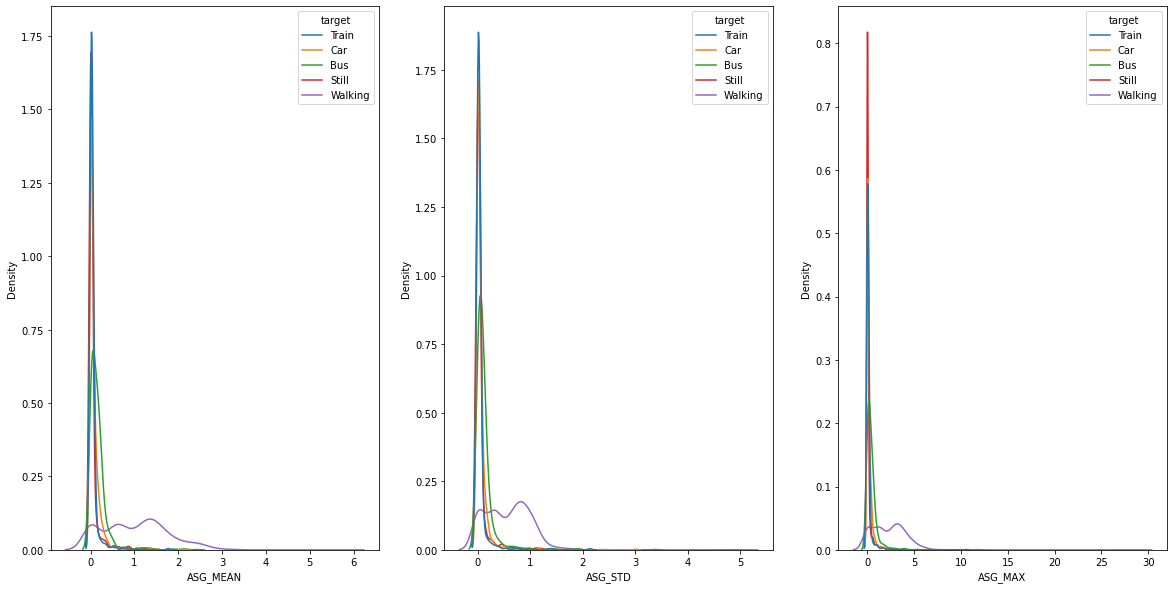

In [24]:
fig, axs = plt.subplots(ncols=3)

sns.kdeplot(data=EDAta, x="ASG_MEAN", hue="target", ax=axs[0])
sns.kdeplot(data=EDAta, x="ASG_STD", hue="target",  ax=axs[1])
sns.kdeplot(data=EDAta, x="ASG_MAX", hue="target", ax=axs[2])

plt.show()

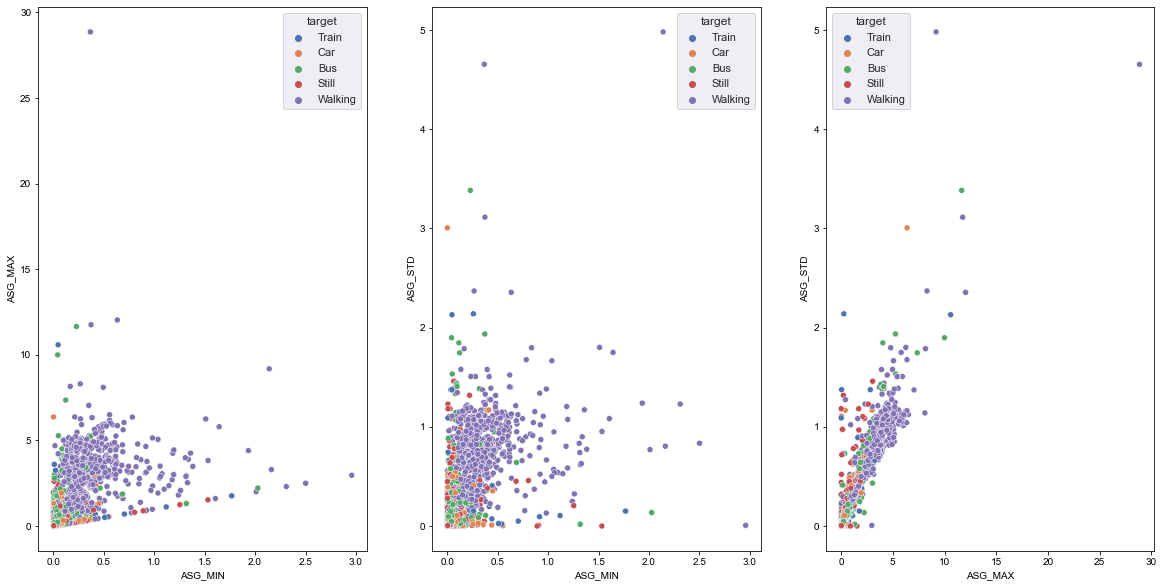

17.52


In [25]:
fig, axs = plt.subplots(ncols=3)
sns.set_theme()
sns.scatterplot(data=EDAta, x='ASG_MIN', y='ASG_MAX', hue='target', ax=axs[0])
sns.scatterplot(data=EDAta, x='ASG_MIN', y='ASG_STD', hue='target', ax=axs[1])
sns.scatterplot(data=EDAta, x='ASG_MAX', y='ASG_STD', hue='target', ax=axs[2])
plt.show()

print(np.round((np.sum(EDAta['ASG_MIN'] == EDAta['ASG_MAX']))/(EDAta['time'].count())*100, 2))

Widać, że istnieją wartości maksymalne które są równe minimalnym, zupełnie jak w przypadku danych dotyczących dźwięku. 18% danych niesie tą samą informację.

Sprawdźmy jak rozkładają się dane na tle statusu ruchu.

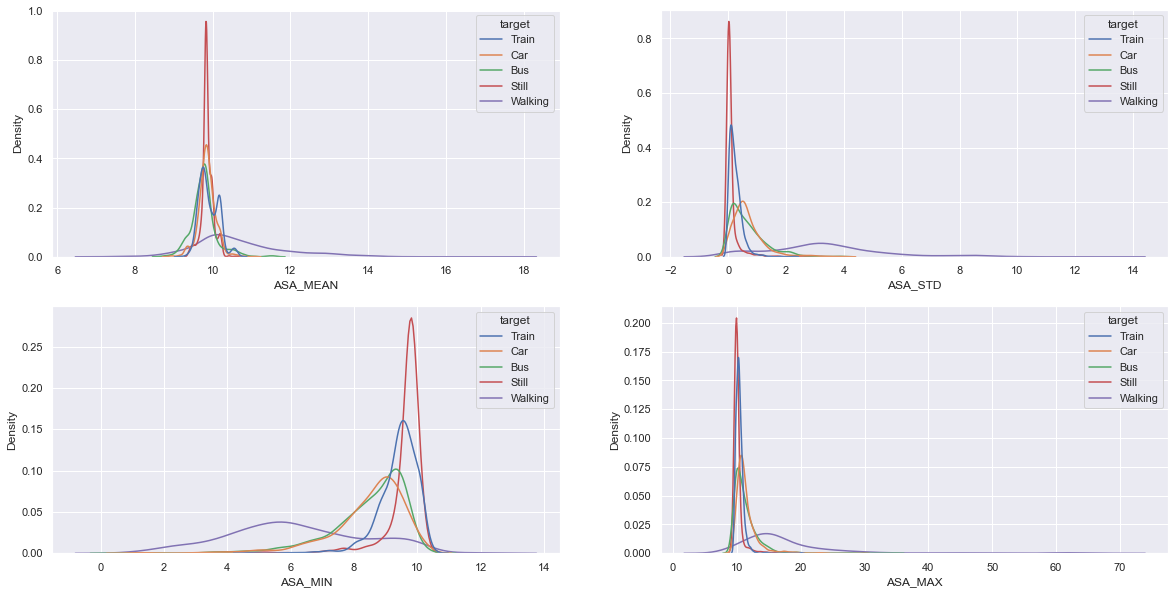

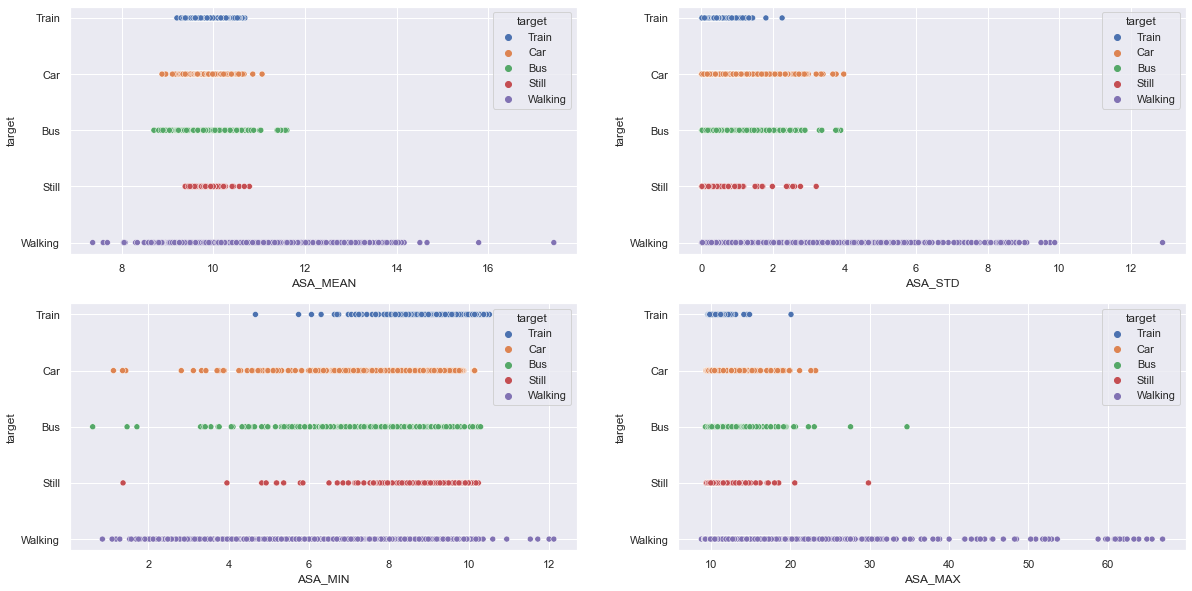

In [26]:
def plot_data_and_target(data=None, x1=None, x2=None, x3=None, x4=None):
    fig, axs = plt.subplots(ncols=2, nrows=2)

    sns.kdeplot(data=data, x=x1, hue="target", ax=axs[0, 0])
    sns.kdeplot(data=data, x=x2, hue="target",  ax=axs[0, 1])
    sns.kdeplot(data=data, x=x3, hue="target", ax=axs[1, 0])
    sns.kdeplot(data=data, x=x4, hue="target", ax=axs[1, 1])

    plt.show()

    fig, axs = plt.subplots(ncols=2, nrows=2)

    sns.scatterplot(data=data, x=x1, y='target', hue='target', ax=axs[0, 0])
    sns.scatterplot(data=data, x=x2, y='target', hue='target', ax=axs[0, 1])
    sns.scatterplot(data=data, x=x3, y='target', hue='target', ax=axs[1, 0])
    sns.scatterplot(data=data, x=x4, y='target', hue='target', ax=axs[1, 1])

    plt.show()
    
plot_data_and_target(data=EDAta, x1="ASA_MEAN", x2="ASA_STD", x3="ASA_MIN", x4="ASA_MAX")

Widzimy, że średnia otrzymanych danych z akcelerometru utrzymuje się wokół wartości 10 dla wszystkich statusów ruchu.

Podczas chodzenia akcelerometr wykrywa najwyższe wartości, a dane są bardziej rozłożone niż w przypadku pozostałych statusów.

Pozostawanie w bezruchu najczęściej skutkuje wykryciem przez akcelerometr średniej wartości od 9 do 11. Dane te są najbardziej skupione ze wszystkich. Biorąc pod uwagę, że ziemia przyciąga nas do siebie z przyspieszeniem 9,8 czyli 1g, jest to jak najbardziej zrozumiałe. Podobnie wygląda skupienie średniej danych w przypadku jazdy pociągiem.

Dane zebrane podczas chodzenia trochę zaburzają nam skalę wykresu. Stwórzmy więc zbiór bez tych danych.

In [27]:
without_walking = EDAta.query('target != "Walking"')

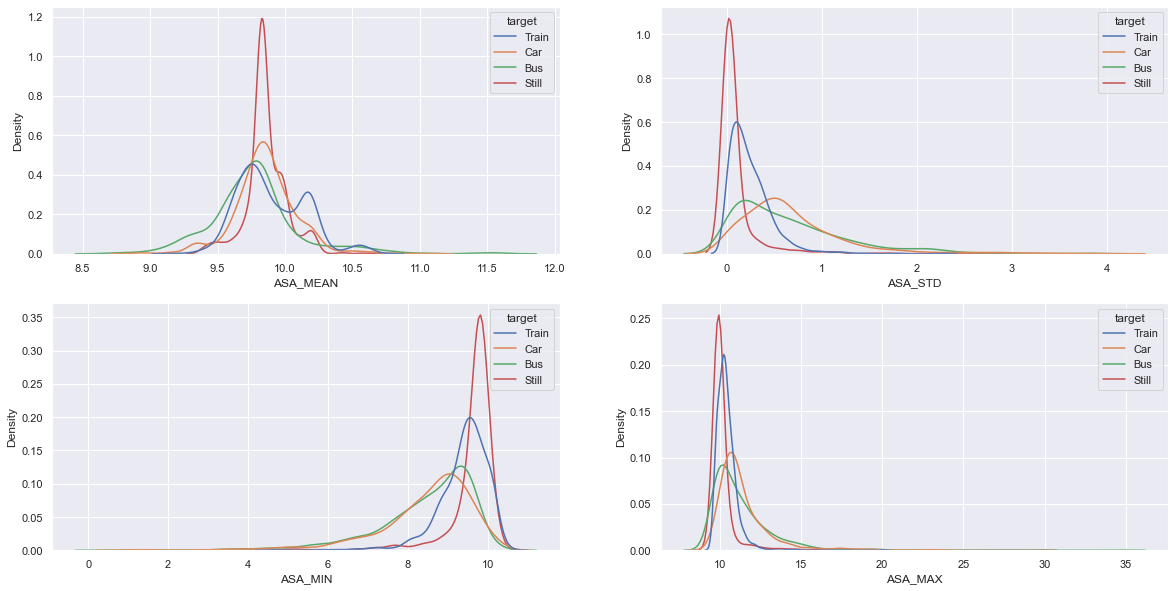

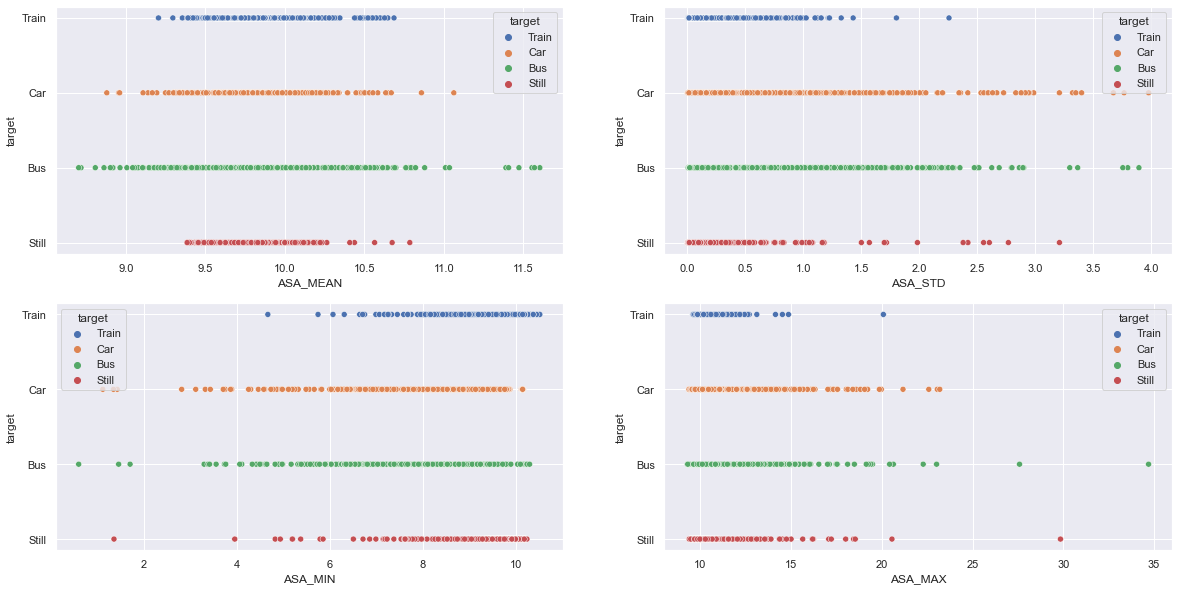

In [28]:
plot_data_and_target(data=without_walking, x1="ASA_MEAN", x2="ASA_STD", x3="ASA_MIN", x4="ASA_MAX")

Widzimy, że średnia danych nadal skupia się wokół wartości przyspieszenia grawitacyjnego. Jednakże rozproszenie danych jest lepiej widoczne. 

Wyklarowały się poziomy stabilości.

Do tego możemy dodać wnioski wyciągnięte z wykresu zawierającego dane zebrane podczas chodzenia, wtedy kolejność poziomów stabilośni jest następująca: pozostawanie w bezruchu, jazda pociągiem, jazda samochodem, jazda autobusem, chodzenie.

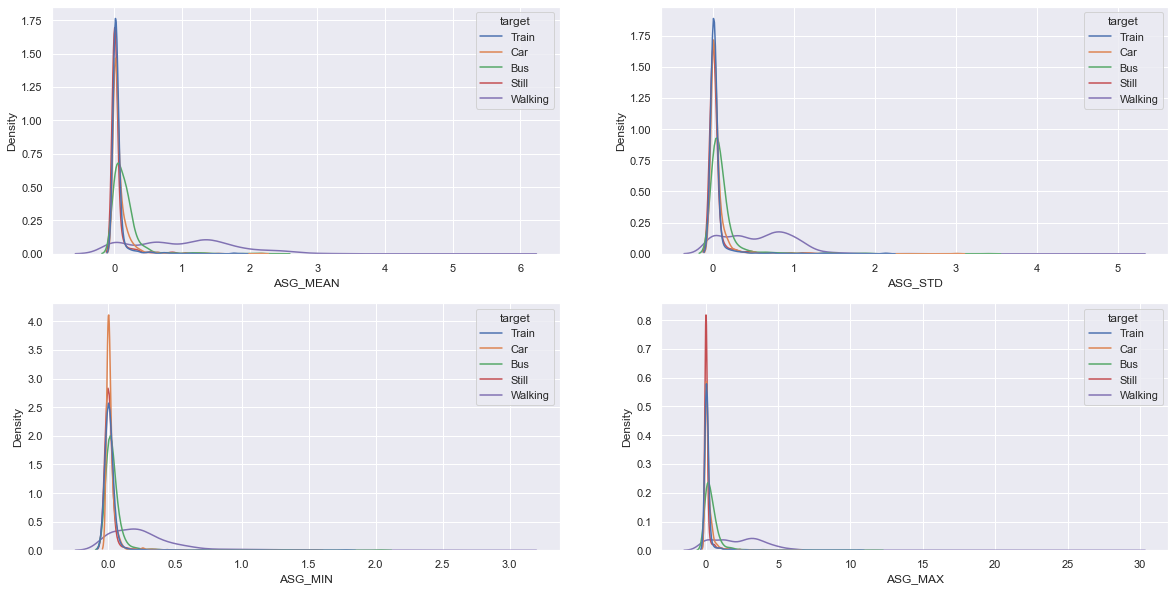

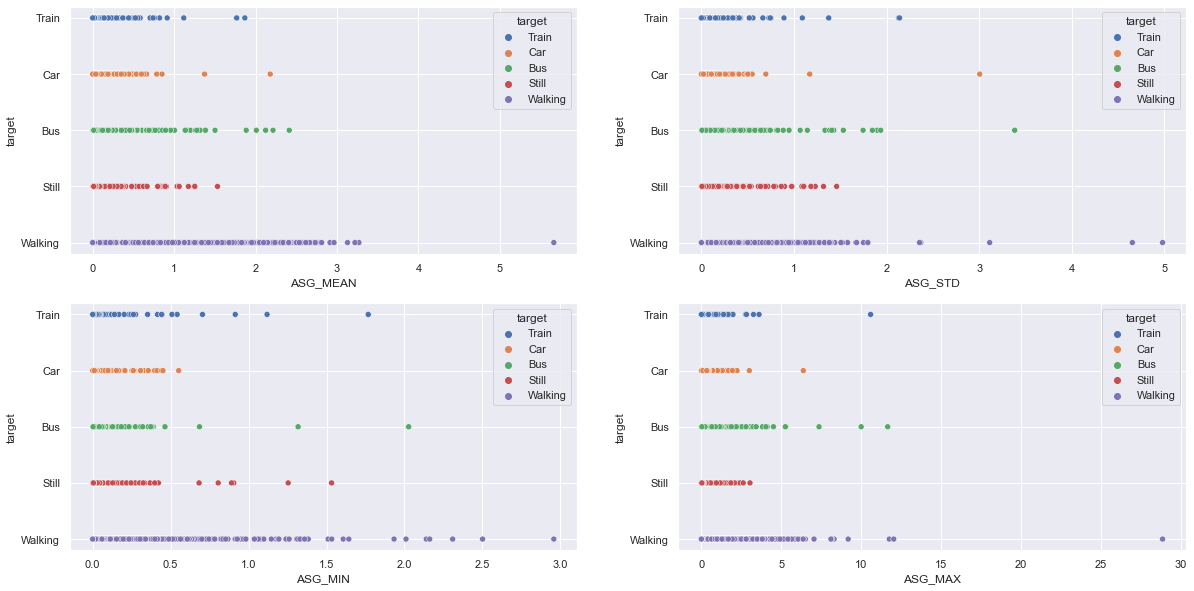

In [29]:
plot_data_and_target(data=EDAta, x1="ASG_MEAN", x2="ASG_STD", x3="ASG_MIN", x4="ASG_MAX")

Widzimy, że w większości przypadków telefony nie zmieniają znacznie swojego kąta położenia.

Jazda autobusem wykazuje się największym poziomem niestabilności.

Czy oznacza to, że podczas jazdy pociągiem nie korzystamy z telefonu? Prawdopodobnie nie, prędzej, że pociągi mniej drgają podczas jazdy.

Chodzenie ponownie zaburza nam czytelność wykresu.

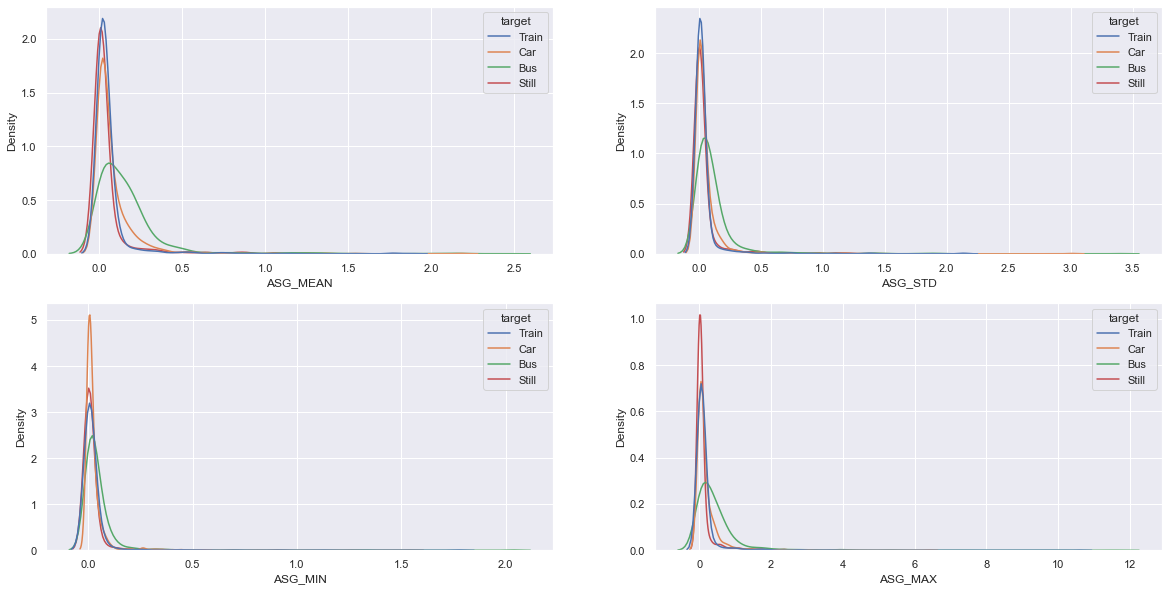

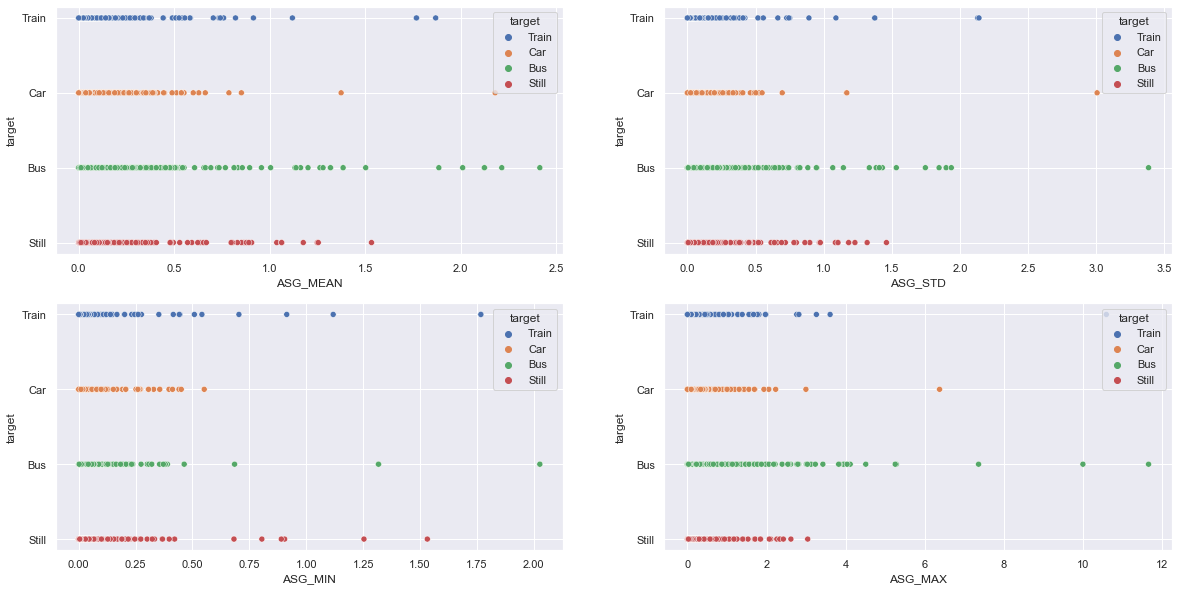

In [30]:
plot_data_and_target(data=without_walking, x1="ASG_MEAN", x2="ASG_STD", x3="ASG_MIN", x4="ASG_MAX")

Otrzymaliśmy potwierdzenie. Wszystkie dane pozostają skupione przy niskich wartościach.

Dane zebrane przez sensor dźwięku już sprawdziliśmy przy okazji weryfikacji 100% korelacji, jednakże zróbmy to jeszcze raz, może znajdziemy coś co umnkęło nam poprzednim razem.

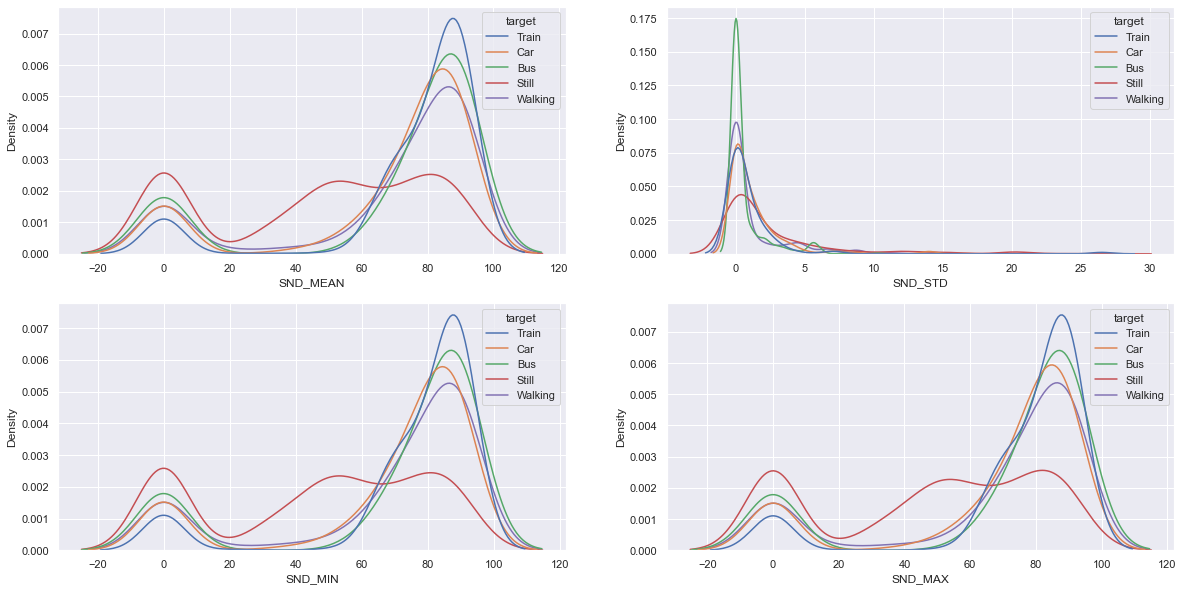

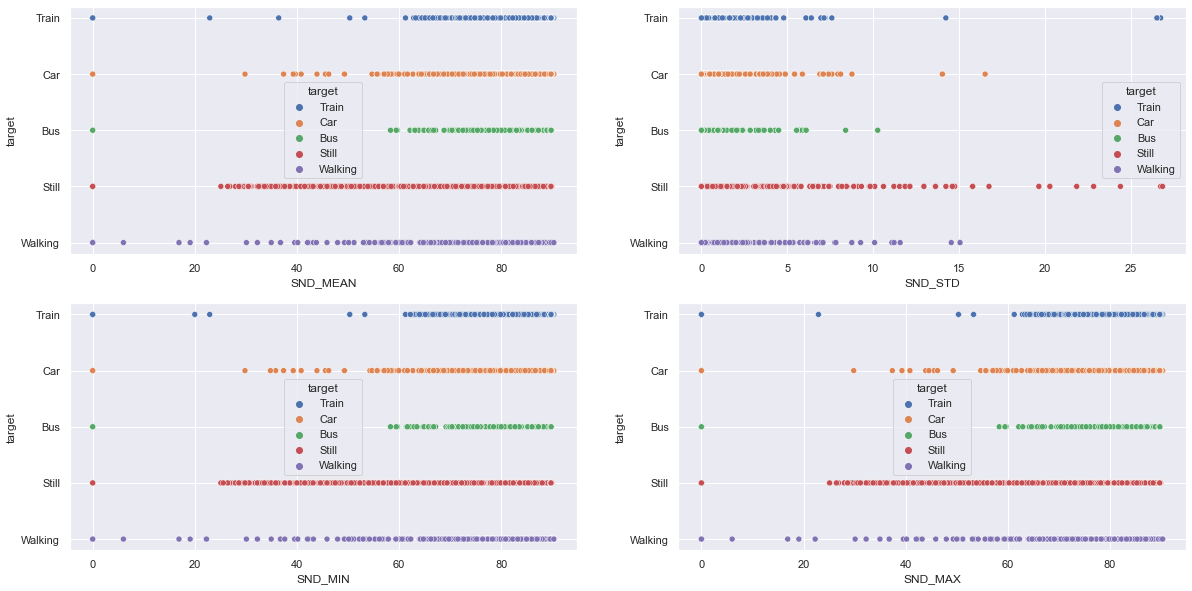

In [31]:
plot_data_and_target(data=EDAta, x1="SND_MEAN", x2="SND_STD", x3="SND_MIN", x4="SND_MAX")

Podróż pociągiem najczęściej powoduje otrzymaniem przez sensor dźwięku wysokiej wartości.

Większość pomiarów dźwięku mieści się w granicach od 60 do 90. Najwięcej z nich zaś wynosi 90.

Pomiary dźwięku podczas pozostawania w bezruchu są mniej więcej równo rozłożone.

Daane zebrane podczas jazdy autobusem najczęśniej mają odchylenie standardowe o wartości 0. Wykres ten mówi nam, że status ruchu może mieć znaczenie w przypadku otrzymywania takiej samej liczby w przypadku wartości minimalnej i maksymalnej poziomu dźwięku.

Z racji, że ruch wiąże się z przyspieszeniem, stwórzmy nową wartość. Weźmy średnią ruchu i podzielmy przez czas trwania statusu.

In [32]:
EDAta['ASAperMINUTE'] = EDAta['ASA_MEAN']/EDAta['time']

Sprawdźmy jak nowe dane rozkładają się w podziale na kategorie.

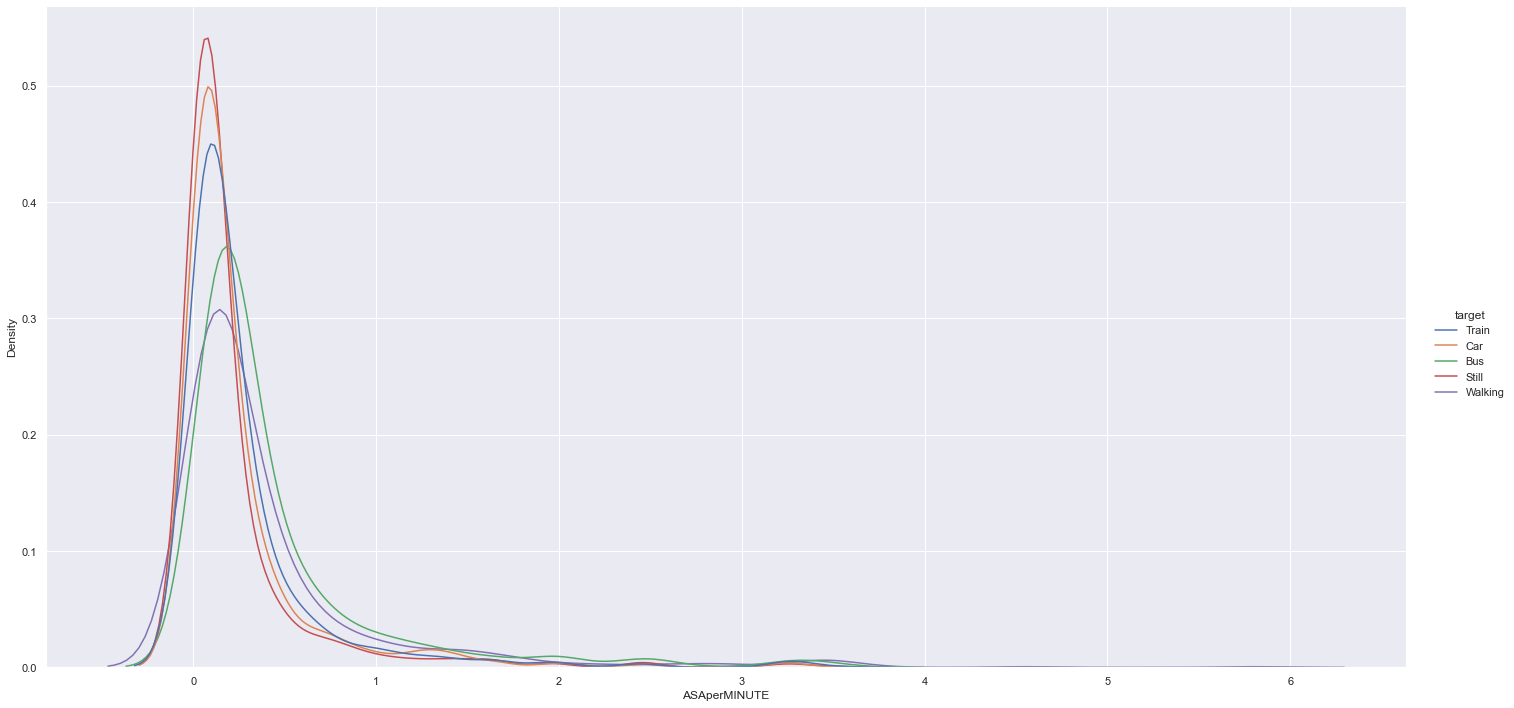

In [33]:
sns.displot(data=EDAta, x='ASAperMINUTE', hue='target', kind='kde', height=10, aspect=2)
plt.show()

Jak widać utworzyły się stopnie z ilością przypadków kiedy wartość ruchu wynosi 0.

Najwięcej danych w okolicy zera stanowi bezruch, a najmniej chodzenie. Pomiędzy nimi znajdziemy trzy stopnie, od góry, samochód, pociąg oraz autobus.

Stwórzmy również podobną cechę jednakże z danych otrzymanych przez żyroskop.

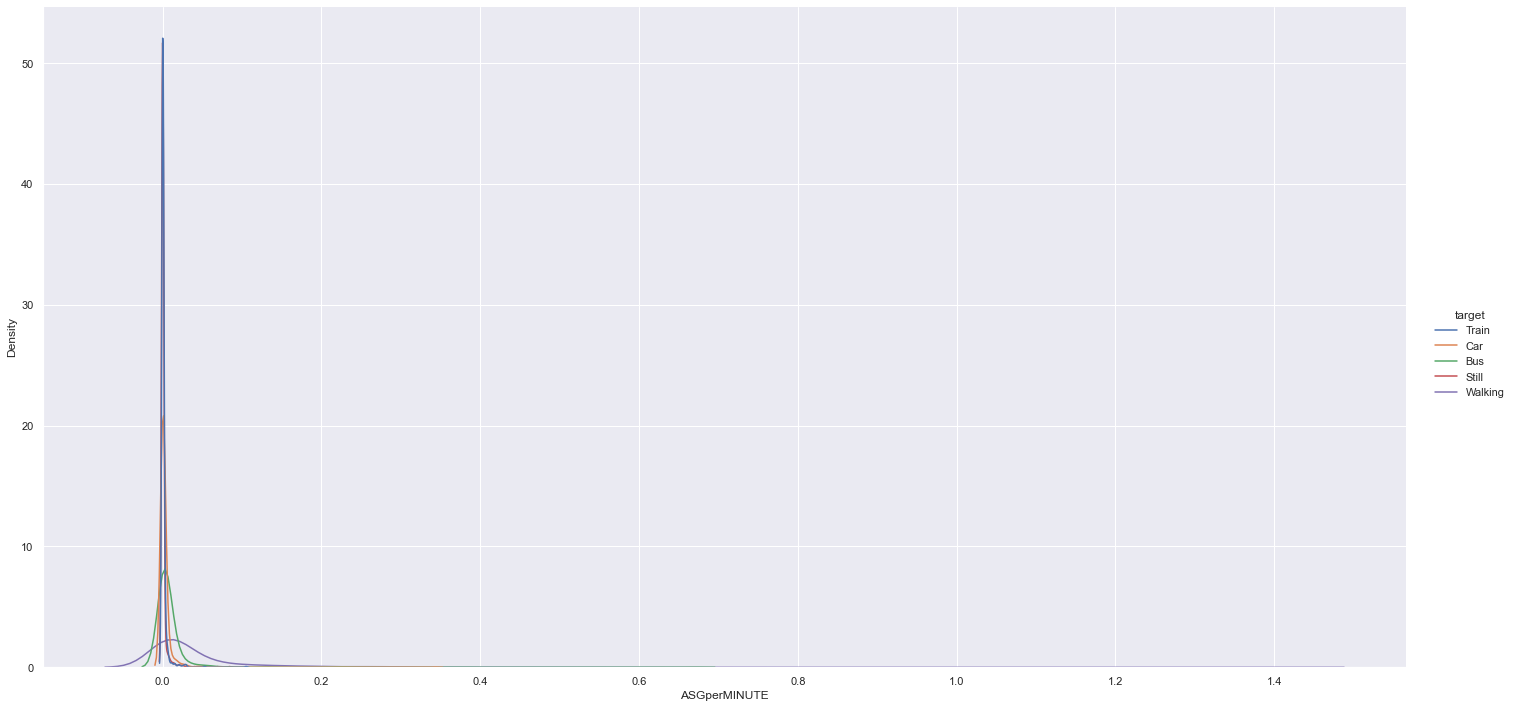

In [34]:
EDAta['ASGperMINUTE'] = EDAta['ASG_MEAN']/EDAta['time']

sns.displot(data=EDAta, x='ASGperMINUTE', hue='target', kind='kde', height=10, aspect=2)
plt.show()

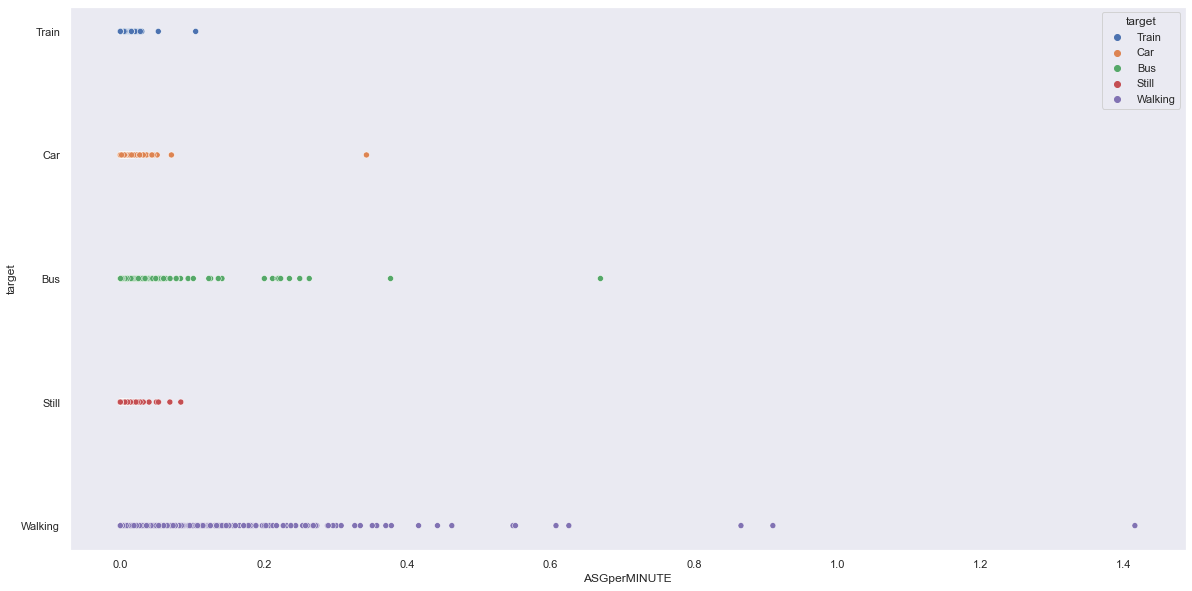

In [35]:
sns.scatterplot(data=EDAta, x='ASGperMINUTE', y='target', hue='target')
plt.grid()
plt.show()

Na wykresie uwidoczniły się dwie skrajności. Kąt nachylenia telefonu podczas minuty, praktycznie się nie zmienia jadąc pociągiem, oraz, że zmienia się niemalże nieustanie podczas chodzenia.

W naszym zbiorze posiadamy odchylenie standardowe, sprawdźmy też, czy zwykły zakres wykarze się większym poziomem korelacji.

In [36]:
EDAta['ASA_RANGE'] = EDAta['ASA_MAX']-EDAta['ASA_MIN']
EDAta['ASG_RANGE'] = EDAta['ASG_MAX']-EDAta['ASG_MIN']

Sprawdźmy również korelację nowych danych.

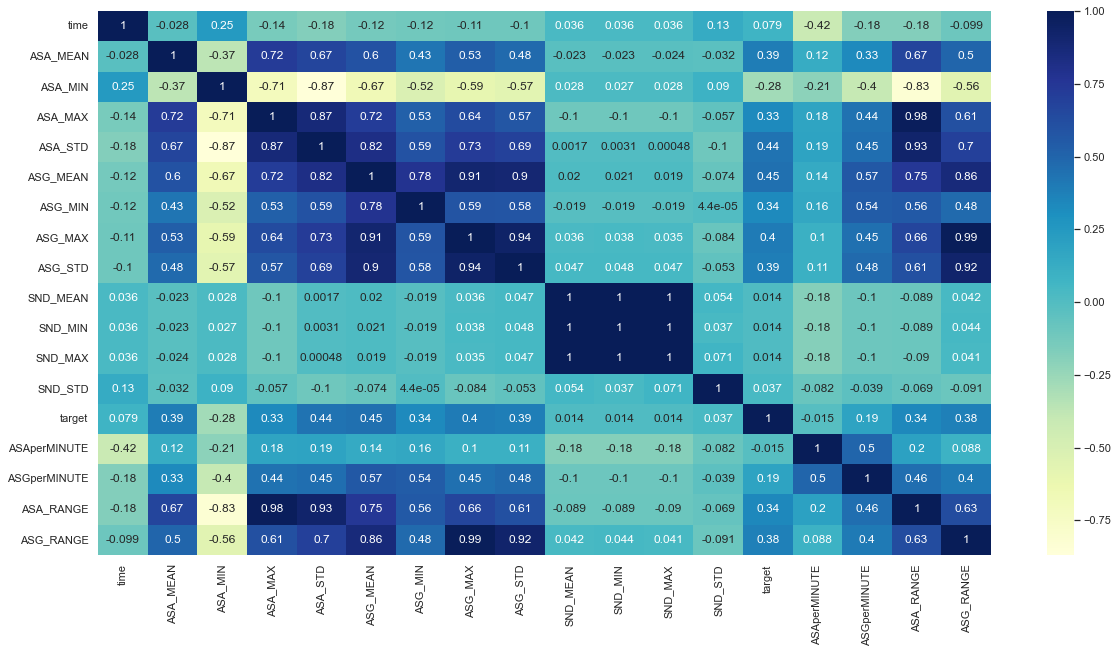

In [37]:
corrEDAta['ASAperMINUTE'] = EDAta['ASAperMINUTE'].copy()
corrEDAta['ASGperMINUTE'] = EDAta['ASGperMINUTE'].copy()
corrEDAta['ASA_RANGE'] = EDAta['ASA_RANGE'].copy()
corrEDAta['ASG_RANGE'] = EDAta['ASG_RANGE'].copy()
sns.heatmap(corrEDAta.corr(), cmap="YlGnBu", annot=True)
plt.show()

Jak widać, cechy przedstawiające dane zebrane w podziale na minuty nie wykazują się większym poziomem korelacji z kolumną docelową, niż cechy z którzych powstały. Mimo tego, pozostawimy je w zbiorze.

Natomiast zwykły zakres osiąga większy poziom korelacji z innymi danymi zebranymi przez sensor niż odchylenie standardowe, więc nie będziemy ich używać.

Zanim przejdziemy dalej sprawdźmy czy GMM (Gausian Mixture Model) czyli algorytm uczenia maszynowego nienadzorowanego znajdzie logikę tam gdzie nie widać jej na pierwszy rzut oka. Szybka nauka oraz wizualizacja bez dostosowywania parametrów.

In [38]:
data = e_X_train.copy()
data.drop(columns=['SND_MIN', 'SND_MEAN'], inplace=True)
d = pd.DataFrame(data)

from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(d)
labels = gmm.predict(d)

D:\PROGRAMMING\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


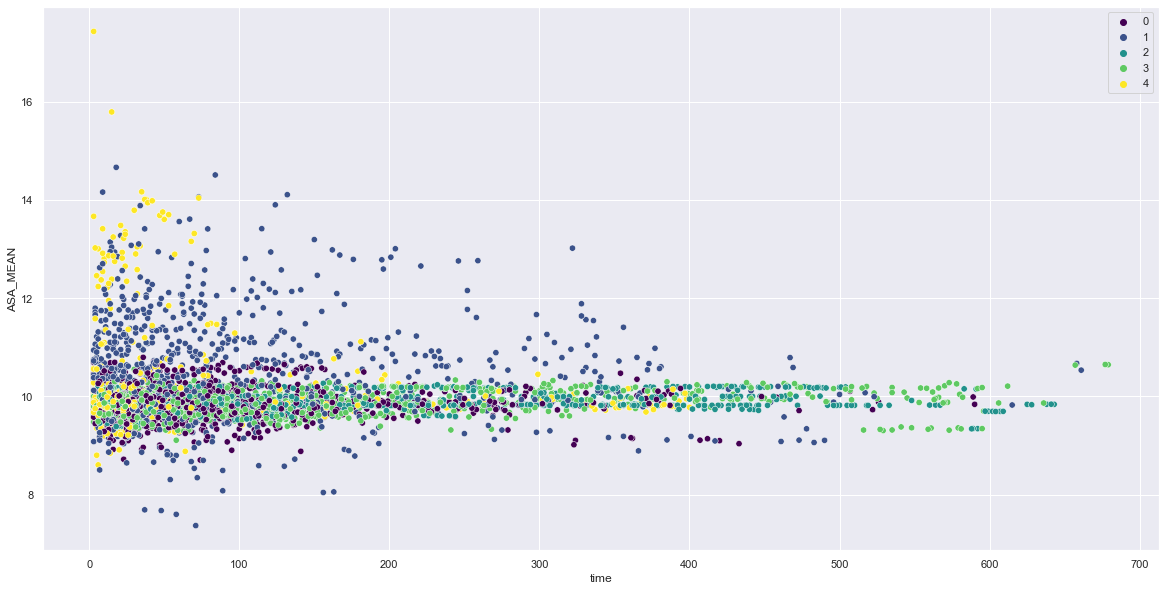

In [39]:
sns.scatterplot(d.iloc[:, 0], d.iloc[:, 1], c=labels, s=40, hue=labels, palette='viridis')
plt.show()

Widzimy, że clustery z kategorii 1, 2 oraz 4 formują linię wzdłuż wartości 10. Natomiast kategorie 0 oraz 3 są bardzo rozproszone. Widzimy więc podział na ruch pojazdami oraz chodzenie i bezruch.

## Podsumowanie

Większość danych poszczególnych kategorii skupia się wokół tych samych wartości, co powoduje, że nie tworzą się wyraźne podziały statusów ruchu.

Model może mieć problemy z tymi skupiskami. Oczywiście na początek stworzę model któremu przekażę wszystkie nieprzetworzone dane, czym uzyskam punkt odniesienia dla następnych modeli.

Z wykresów przedstawionych wyżej wynika, że:

-Dane zebrane przez akcelerometr i żyroskop, należące do statusu "Walking" cechują się szerokim rozkładem,

-Dane dotyczące poziomu dźwięku są najszerzej rozstawione w przypadku statusu "Still",

-Podróż pociągiem najczęściej skutkuje otrzymaniem przez sensor dźwięku wartości 90.

Większość wykresów ma "long tail", co oznacza spore oddalenie od średniej. Jest to spowodowane sporą ilością outlierów w naszym zbiorze.

# Wybór modeli

Skoro już mamy pojęcie jakimi danymi dysponujemy, przejdźmy do wyboru modelu jaki będziemy uczyć.

Nasz Klient poinformował nas, że chce aby model nie przeszkadzał użytkownikom. Oznacza to, że asystent powinen reagować jedynie kiedy będzie miał 100% pewność co do aktualnego środka transportu. Klient woli, żeby asystent milczał niż się mylił.

Wynika z tego, że nasz model będziemy oceniać poprzez recall.



Naszym zadaniem jest oczywiście klasyfikacja multiklasowa.

Nasze dane tworzą jedno skupisko, przez co brak ewidentnych podziałów.

Ilość danych do nauki nie jest zbyt duża.

W naszym zbiorze ilość cech nie przekracza 20, więc redukcja wymiarowości nie będzie potrzebna.

Wyuczmy w takim razie następujące algorytmy:

-KNN,

-Decision Tree,

-Random Forest,

-Sprawdźmy również Logistic Regression (pomimo jednego skupiska danych)

# Tworzenie modeli

Stwórzmy zbiór danych do uczenia. Zgodnie z wnioskami wyciągniętymi podczas EDA, ze wszystkich cech odwołujących się do sensora dźwięku, zostawimy jedynie SND_MAX oraz SND_STD.

In [40]:
learning_data = db.copy()
learning_data['time'] = learning_data['time'].astype(int)
learning_data['ASAperMINUTE'] = learning_data['ASA_MEAN']/learning_data['time']
learning_data['ASGperMINUTE'] = learning_data['ASA_MEAN']/learning_data['time']
y = learning_data['target']
X = learning_data.drop(['target', 'SND_MIN', 'SND_MEAN'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Import bibliotek

In [41]:
# ALGORYTMY
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# GridSearch i Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

# Ocena
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, plot_confusion_matrix, plot_roc_curve
from yellowbrick.classifier import ROCAUC
from mlxtend.plotting import plot_decision_regions

#### Pre-processing pipeline

In [42]:
num_feat = X_train.columns

num_prep = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures()),
    ('scaler_1', StandardScaler())
])

data_prep = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_prep, num_feat)
])

In [43]:
def teach_and_check_scores(X_train, y_train, X_test, y_test, model):
    
    model.fit(X_train, y_train)
    
    preds = model.predict(X_test)
    
    preds_proba = model.predict_proba(X_test)    
    
    print(classification_report(y_test, preds))
    
    print(f'ROC AUC SCORE: {roc_auc_score(y_test, preds_proba, multi_class="ovr")}')

    plot_confusion_matrix(model, X_test, y_test, cmap='Blues')

Zacznijmy trenowanie modeli na bazowym zbiorze.

### KNN

In [67]:
knn_clf = Pipeline(steps=[('preprocessor', data_prep),
                          ('model', KNeighborsClassifier())])

In [68]:
params = {
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [2, 3, 4, 5],
    'model__n_neighbors': [3, 5, 7],
    'model__n_jobs': [-1, 200, 500, 1000],
    'model__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(knn_clf, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
knn_v1 = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wybrane hiperparametry:  {'model__n_jobs': -1, 'model__n_neighbors': 3, 'model__weights': 'distance', 'preprocessor__numeric_preprocessing__polynomial_features__degree': 5}


              precision    recall  f1-score   support

         Bus       0.70      0.86      0.77       189
         Car       0.79      0.69      0.74       243
       Still       0.93      0.90      0.91       248
       Train       0.78      0.79      0.78       243
     Walking       0.92      0.91      0.92       256

    accuracy                           0.83      1179
   macro avg       0.82      0.83      0.82      1179
weighted avg       0.83      0.83      0.83      1179

ROC AUC SCORE: 0.9362862158085189


D:\PROGRAMMING\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


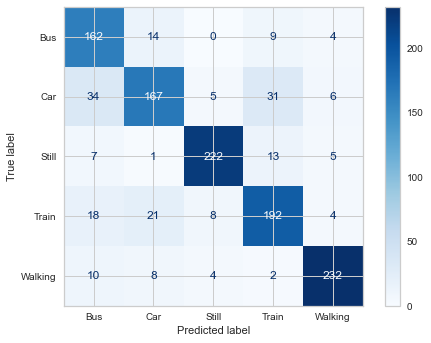

In [48]:
teach_and_check_scores(X_train, y_train, X_test, y_test, knn_v1)

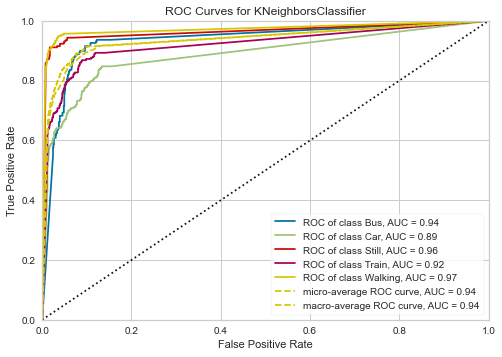

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
visualizer = ROCAUC(knn_v1, classes=np.unique(y_test))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Jak widać nie jest źle. Wynik na poziomie 83% przy pierwszej próbie jest zadowalający. Algorytm najczęśniej myli samochód z autobusem, samochód z pociągiem oraz pociąg z samochodem. Za to radzi sobie nadwyraz dobrze z kategorią chodzenie i pozostawanie bez ruchu.

### Decision Tree

In [51]:
tree_clf = Pipeline(steps=[('preprocessor', data_prep),
                           ('model', DecisionTreeClassifier())])

In [52]:
params = {
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [2, 3, 4, 5],
    'model__max_leaf_nodes': [2, 3, 5, 7],
    'model__max_depth': [1, 2, 3, 5, 7],
    'model__random_state': [None, 42],
}

grid_search = GridSearchCV(tree_clf, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
tree_v1 = grid_search.best_estimator_

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Wybrane hiperparametry:  {'model__max_depth': 5, 'model__max_leaf_nodes': 7, 'model__random_state': None, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 3}


              precision    recall  f1-score   support

         Bus       0.59      0.59      0.59       189
         Car       0.49      0.48      0.48       243
       Still       0.77      0.74      0.76       248
       Train       0.53      0.63      0.58       243
     Walking       0.91      0.79      0.85       256

    accuracy                           0.65      1179
   macro avg       0.66      0.65      0.65      1179
weighted avg       0.66      0.65      0.66      1179

ROC AUC SCORE: 0.8565398537175277


D:\PROGRAMMING\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


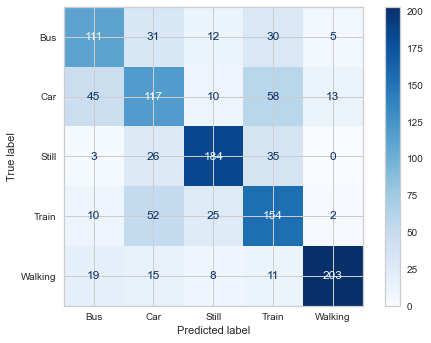

In [53]:
teach_and_check_scores(X_train, y_train, X_test, y_test, tree_v1)

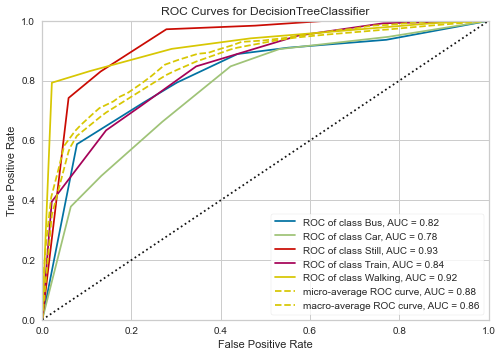

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [54]:
visualizer = ROCAUC(tree_v1, classes=np.unique(y_test))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Algorytm ma problem z rozróżnieniem pojazdu.

Drzewo nie sprawdziło się w tym przypadku. Zgodnie z tymi wynikami, las również nie powninen osiągnąć wysokiego wyniku. Sprawdźmy to.

### Random Forest

In [55]:
forest_clf = Pipeline(steps=[('preprocessor', data_prep),
                           ('model', RandomForestClassifier())])

In [56]:
params = {
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [2, 3, 4],
    'model__max_leaf_nodes': [2, 3, 5],
    'model__max_depth': [1, 2, 3, 5],
    'model__n_jobs': [-1, 10, 100],
    'model__random_state': [None, 42],
}

grid_search = GridSearchCV(forest_clf, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
forest_v1 = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Wybrane hiperparametry:  {'model__max_depth': 5, 'model__max_leaf_nodes': 5, 'model__n_jobs': -1, 'model__random_state': 42, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 2}


              precision    recall  f1-score   support

         Bus       0.48      0.65      0.56       189
         Car       0.64      0.41      0.50       243
       Still       0.77      0.75      0.76       248
       Train       0.54      0.59      0.56       243
     Walking       0.86      0.87      0.86       256

    accuracy                           0.66      1179
   macro avg       0.66      0.66      0.65      1179
weighted avg       0.67      0.66      0.66      1179

ROC AUC SCORE: 0.890843217874656


D:\PROGRAMMING\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


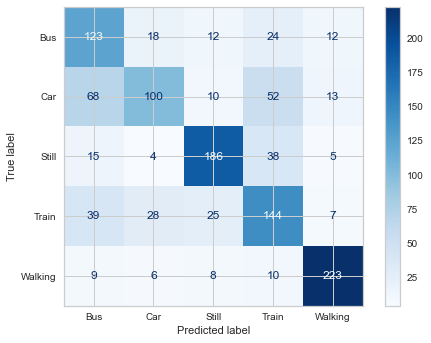

In [57]:
teach_and_check_scores(X_train, y_train, X_test, y_test, forest_v1)

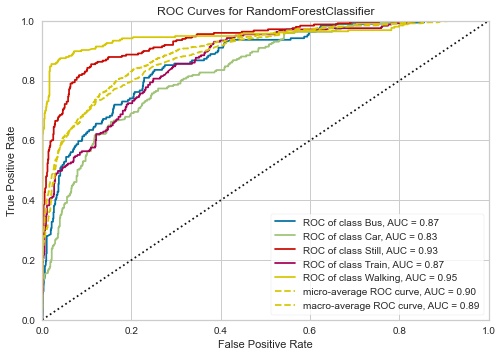

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [58]:
visualizer = ROCAUC(forest_v1, classes=np.unique(y_test))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Zgodnie z oczekiwaniami, wynik lasu również nie jest zadowalający.

##### Logistic Regression

In [59]:
num_feat = X_train.columns

num_prep = Pipeline(steps=[
    ('polynomial_features', PolynomialFeatures()),
    ('scaler_1', StandardScaler()),
    ('min_max', MinMaxScaler())
])

data_prep = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_prep, num_feat)
])

In [60]:
log_reg_clf = Pipeline(steps=[('preprocessor', data_prep),
                           ('model', LogisticRegression(solver='newton-cg'))])

In [61]:
params = {
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [2, 3, 4],
    'model__C': [0.3, 0.5, 0.7, 1.0],
    'model__n_jobs': [-1, 10, 100],
    'model__random_state': [None, 42],
}

grid_search = GridSearchCV(log_reg_clf, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
log_reg_v1 = grid_search.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Wybrane hiperparametry:  {'model__C': 1.0, 'model__n_jobs': -1, 'model__random_state': None, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 4}


              precision    recall  f1-score   support

         Bus       0.50      0.67      0.57       189
         Car       0.62      0.40      0.49       243
       Still       0.67      0.78      0.72       248
       Train       0.52      0.52      0.52       243
     Walking       0.91      0.82      0.86       256

    accuracy                           0.64      1179
   macro avg       0.64      0.64      0.63      1179
weighted avg       0.65      0.64      0.64      1179

ROC AUC SCORE: 0.8832596174843619


D:\PROGRAMMING\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


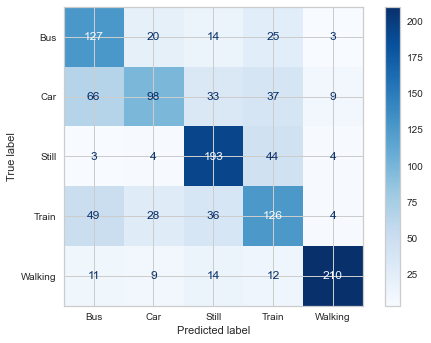

In [62]:
teach_and_check_scores(X_train, y_train, X_test, y_test, log_reg_clf)

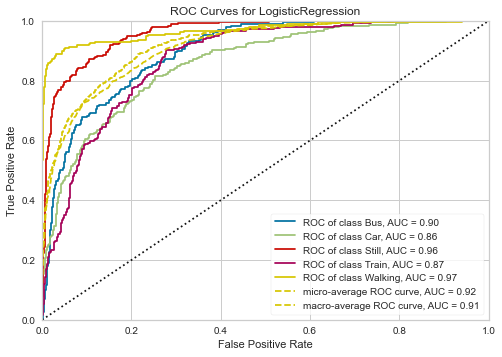

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [63]:
visualizer = ROCAUC(log_reg_v1, classes=np.unique(y_test))
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

 Wytworzył nam się wzorzec. Algorytmy mają spory problem z rozróżnieniem pojazdu. Przyczyną może być fakt, że dane zebrane podczas jazdy pojazdami mają za małą różnorodność między sobą, w przeciwieństwie do pozostawania w bezruchu oraz chodzenia.
 
Nasuwa się pytanie, co wyróżnia te dwa statusy ruchu, jak również, w jaki sposób algorytmy je rozróżniają. Czy fakt, że pośród tych statusów jest najwięcej outlierów ma znaczenie? Czy jest to główne kryterium naszych algorytmów?

Z podstawowymi danymi najlepiej poradził sobie algorytm KNN. Teraz należy poprawić jego wydajność. Możemy to osiągnąć poprzez dostarczenie bardziej różnorodnych danych. To jest, przez dostarczenie danych z innych sensorów albo dodatkową obróbkę już posiadanych.

## Eksperyment

Skoro algorytm KNN ma problemy z poprawną klasyfikacją środków transportu (samochód, autobus, pociąg), to czy możemy wyćwiczyć dwa osobne modele, jeden do klasyfikacji poza pojazdem a drugi tylko do pojazdów?

Logika systemu będzie następująca. Sklasyfikuj dane na trzy kategorie tj. chodzenie, bezruch, pozostałe. Nazwijmy je poza pojazdowe. Jeżeli otrzymane dane zostaną sklasyfikowane jako pozostałe, zostaną przekazane do drugiego modelu który zajmuje się podział na pozostałe kategorie tj. samochód, autobus, pociąg. Nazwijmy je pojazdowe. W ten sposób pozbędziemy się zaburzających pracę modelu statusów ruchu.

Jako, że algorytm KNN poradził sobie najlepiej, wykorzystamy go do naszego systemu.

### KNN - Poza pojazdowe

Najpierw musimy przekształcić nasz zbiór. Zamienimy nazwy statusów ruchu na 'walking', 'still' oraz 'other'.

In [51]:
experimental_data = db.copy()

experimental_data.replace(to_replace=['Car', 'Bus', 'Train'],
                          value= ['Other', 'Other', 'Other'], 
                          inplace=True)

Następnie czyścimy, dodajemy nowe cechy oraz dzielimy zbiór.

In [56]:
experimental_data['time'] = experimental_data['time'].astype(int)
experimental_data['ASAperMINUTE'] = experimental_data['ASA_MEAN']/experimental_data['time']
experimental_data['ASGperMINUTE'] = experimental_data['ASA_MEAN']/experimental_data['time']
e_y = experimental_data['target']
e_X = experimental_data.drop(['target', 'SND_MIN', 'SND_MEAN'], axis=1)
e_X_train, e_X_test, e_y_train, e_y_test = train_test_split(e_X, e_y, test_size=0.20, random_state=42)

In [57]:
e_knn_clf = Pipeline(steps=[('preprocessor', data_prep),
                          ('model', KNeighborsClassifier())])

In [58]:
params = {
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [2, 3, 4, 5],
    'model__n_neighbors': [3, 5, 7],
    'model__n_jobs': [-1, 200, 500, 1000],
    'model__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(e_knn_clf, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(e_X_train, e_y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
knn_v2 = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wybrane hiperparametry:  {'model__n_jobs': -1, 'model__n_neighbors': 3, 'model__weights': 'distance', 'preprocessor__numeric_preprocessing__polynomial_features__degree': 2}


              precision    recall  f1-score   support

       Other       0.94      0.97      0.95       675
       Still       0.93      0.89      0.91       248
     Walking       0.94      0.91      0.92       256

    accuracy                           0.94      1179
   macro avg       0.94      0.92      0.93      1179
weighted avg       0.94      0.94      0.94      1179

ROC AUC SCORE: 0.9699388419745577


D:\PROGRAMMING\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


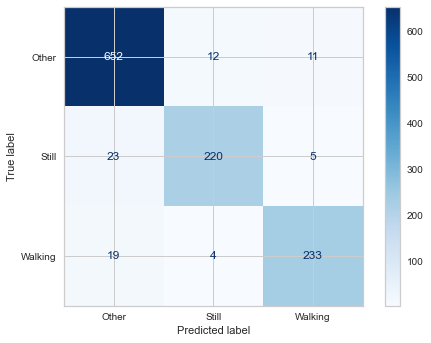

In [59]:
teach_and_check_scores(e_X_train, e_y_train, e_X_test, e_y_test, knn_v2)

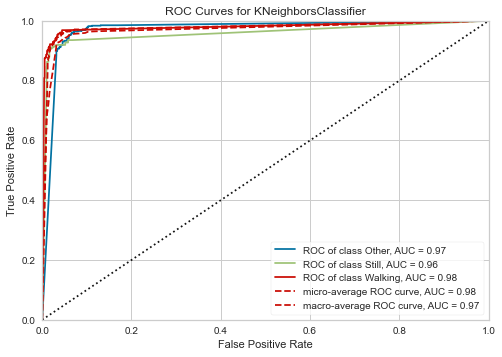

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [60]:
visualizer = ROCAUC(knn_v2, classes=np.unique(e_y_test))
visualizer.fit(e_X_train, e_y_train)
visualizer.score(e_X_test, e_y_test)
visualizer.show()

Jak widać, wynik jest bardziej niż zadowalający.

Teraz przejdźmy do modelu klasyfikującego dane pojazdowe otrzymane od powyższego algorytmu.

### KNN - Pojazdowe

W przypadku tego algorytmu sprawa wygląda nieco inaczej. Będzie on trenowany przy mniejszej ilości danych. Ze zbioru bazowego wyrzucimy dane z klas które już wcześniej zostały sklasyfikowane tj. 'Walking' oraz 'Still'.

In [45]:
e_data_v2 = db.copy()
e_data_v2 = e_data_v2.drop(e_data_v2[(e_data_v2.target == 'Still') | (e_data_v2.target == 'Walking')].index)

In [46]:
e_data_v2['time'] = e_data_v2['time'].astype(int)
e_data_v2['ASAperMINUTE'] = e_data_v2['ASA_MEAN']/e_data_v2['time']
e_data_v2['ASGperMINUTE'] = e_data_v2['ASA_MEAN']/e_data_v2['time']
ex_y = e_data_v2['target']
ex_X = e_data_v2.drop(['target', 'SND_MIN', 'SND_MEAN'], axis=1)
ex_X_train, ex_X_test, ex_y_train, ex_y_test = train_test_split(ex_X, ex_y, test_size=0.20, random_state=42)

In [47]:
ex_knn_clf = Pipeline(steps=[('preprocessor', data_prep),
                          ('model', KNeighborsClassifier())])

In [48]:
params = {
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [2, 3, 4, 5],
    'model__n_neighbors': [3, 5, 7],
    'model__n_jobs': [-1, 200, 500, 1000],
    'model__weights': ['uniform', 'distance']
}

grid_search = GridSearchCV(ex_knn_clf, params, cv=5, n_jobs=-1, verbose=10, scoring='f1_macro')
grid_search.fit(ex_X_train, ex_y_train)
print('Wybrane hiperparametry: ', grid_search.best_params_)
knn_v3 = grid_search.best_estimator_

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Wybrane hiperparametry:  {'model__n_jobs': -1, 'model__n_neighbors': 3, 'model__weights': 'distance', 'preprocessor__numeric_preprocessing__polynomial_features__degree': 4}


              precision    recall  f1-score   support

         Bus       0.79      0.84      0.81       232
         Car       0.80      0.72      0.76       241
       Train       0.81      0.83      0.82       235

    accuracy                           0.80       708
   macro avg       0.80      0.80      0.80       708
weighted avg       0.80      0.80      0.80       708

ROC AUC SCORE: 0.9169390731847304


D:\PROGRAMMING\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


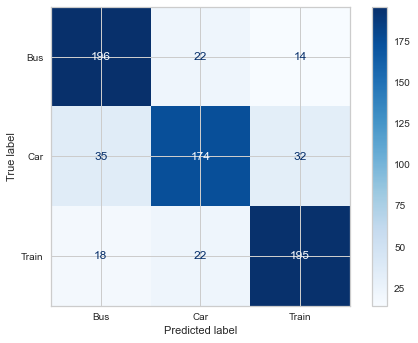

In [49]:
teach_and_check_scores(ex_X_train, ex_y_train, ex_X_test, ex_y_test, knn_v3)

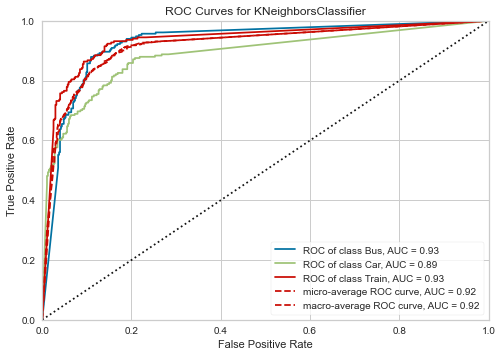

<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [50]:
visualizer = ROCAUC(knn_v3, classes=np.unique(ex_y_test))
visualizer.fit(ex_X_train, ex_y_train)
visualizer.score(ex_X_test, ex_y_test)
visualizer.show()

         Bus       0.70      0.86      0.77       189
         Car       0.79      0.69      0.74       243
       Still       0.93      0.90      0.91       248
       Train       0.78      0.79      0.78       243
     Walking       0.92      0.91      0.92       256

    accuracy                           0.83      1179
   macro avg       0.82      0.83      0.82      1179
weighted avg       0.83      0.83      0.83      1179

Model uzyskał wynik 80% recall. Jest odrobinę gorszy niż pierwszy model przygotowany do klasyfikacji całego zbioru.

# Podsumowanie

Po rodzieleniu problemu na dwa etapy mamy pewność, że dwa statusy z pięciu będą dokładniej klasyfikowane, przez co użytkownicy asystenta będą dostawać dokładniejsze powiadomienia podczas chodzenia oraz pozostawania w bezruchu.

Biorąc pod uwagę rozkład posiadanych danych, uzyskanie takich wyników można uznać za sukces. Klient został poinformowany, o wynikach przygotowanych algorytmy do wykorzystania przy tworzeniu asystenta. Został poinformowany o konieczności pozyskania większej ilości danych w celu zwiększenia skuteczności algorytmów. Postanowił więc, że wykorzysta obecne algorytmy przy produkcji bety swojego asystenta w miedzyczasie pobierając nowe, bardziej rozbudowane dane.

# KONIEC CZĘŚCI I